In [35]:
from keras import models
from keras.models import load_model
from keras import layers
from keras.utils import np_utils, generic_utils
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG19
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from keras.optimizers import adam
import pickle
import numpy as np
import matplotlib.pyplot as plt
from keras.backend import manual_variable_initialization 
manual_variable_initialization(True)

In [40]:
### Get data from the input file ###

infile = open('S:\\Usyd\\Project\\Data\\trData','rb')
Images = pickle.load(infile)
Labels = pickle.load(infile)
infile.close()

binaryLabels = np_utils.to_categorical(Labels)
xtest = Images
ytest = binaryLabels
#ytest = Labels
print(xtest.shape)
print(ytest.shape)

(3920, 224, 224, 3)
(3920, 2, 2)


[1. 0.]
[1. 0.]
[0. 1.]
[1. 0.]
[1. 0.]


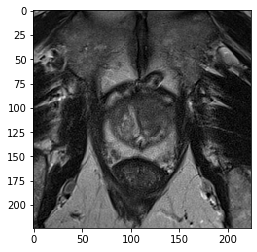

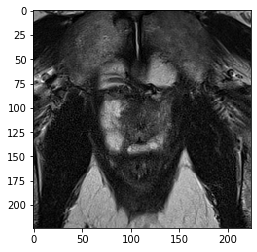

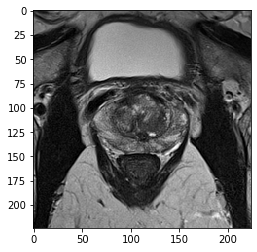

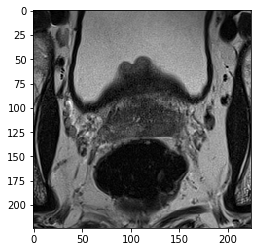

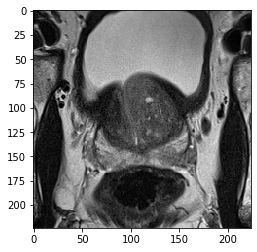

In [9]:
### check a test image
import matplotlib.pyplot as plt
for i in range (0,5):
    plt.figure()
    plt.imshow(xtest[i,:, :, 0],cmap='gray')
    print (ytest[i,:])

In [37]:
### load the trained model
model = load_model('S:\\Usyd\\Project\\Data\\Model_output\\Model\\VGG19PTCW_Test3_Fold1.h5')

In [38]:
### Compute the AUC
ypred = model.predict(xtest)
AUC = roc_auc_score(ytest, ypred)
print (AUC)

fpr, tpr, _ = roc_curve(ytest[:,1], ypred[:,1])

In [52]:
print('AUC = ', AUC)

AUC =  0.47725000000000006


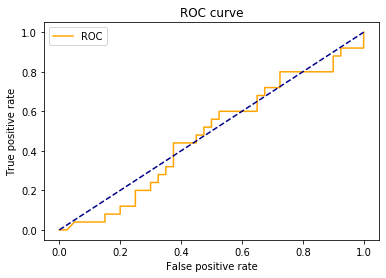

In [39]:
plt.figure()
plt.plot(fpr, tpr,'orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [23]:
### Compute the standard Accuracy
score, acc = model.evaluate(xtest, ytest,
                            batch_size=64)

print(acc)

65/65 [==============================] - 26s 405ms/step
0.5230769515037537


In [8]:
count = 0
for i in range(len(ytest)):
    if ytest[i,1]==1:
        count+=1
print(count)

25


In [46]:
infile = open('S:\\Usyd\\Project\\Data\\trData','rb')
Imagess = pickle.load(infile)
Labelss = pickle.load(infile)
infile.close()

In [47]:
print(Labelss[0:5,:])

[[0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [26]:
sum(Labelss)

47

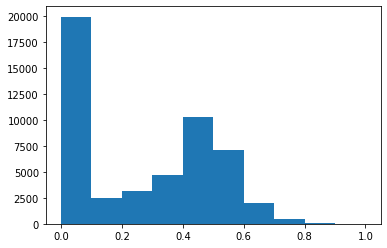

In [50]:
import numpy as np
from matplotlib import pyplot as plt

img = Images[3,:,:,1]
plt.hist(img.ravel(),10,[0,1]); plt.show()